In [30]:
import pandas as pd
from patsy import dmatrices
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math
from _py_helpers.generate_tv_training_df import tv_df
from sklearn import cross_validation
from sklearn.linear_model import LinearRegression

##<font color='blue'>LOG-Y* MODELING using patsy, statsmodels AND CROSS-VALIDATION using scikit (Predicting # of seasons)</font>

###*Note: Log-Y only used when modeling. Y is converted back to its original state after creating the model and for predictions

####<font color='red'>Case 1: With 1 numeric predictor variable (User rating)</font>

In [4]:
tv_df.head(1)

,Ind,Title_SR,Genre,Tag,Title_Norm,Seasons,Episodes,Status,Duration,UserRating,Network,Title_Wiki,State,SeasonsLog,Network_Count
576,584,The Job,Reality,/the_job,thejob,1,2,Concluded,60 min,1,CBS,,,0,3


In [31]:
log_train1_y, log_train1_X = dmatrices('SeasonsLog ~ UserRating', data=tv_df, return_type='dataframe')
log_train1_model = sm.OLS(log_train1_y, log_train1_X).fit()
log_train1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SeasonsLog   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     189.8
Date:                Sat, 18 Jul 2015   Prob (F-statistic):           3.82e-38
Time:                        22:11:05   Log-Likelihood:                -731.98
No. Observations:                 664   AIC:                             1468.
Df Residuals:                     662   BIC:                             1477.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -1.9317      0.197     -9.794      0.000        -2.319    -1.544
UserRating     0.7461      0.054     13.776      0.000         0.640     0.852
==============================================================================
Omnibus:                       31.986   Durbin-Watson:                   1.131
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.864
Skew:                           0.569   Prob(JB):                     1.63e-08
Kurtosis:                       2.944   Cond. No.                         27.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[0.5, 5.5, -5, 25]

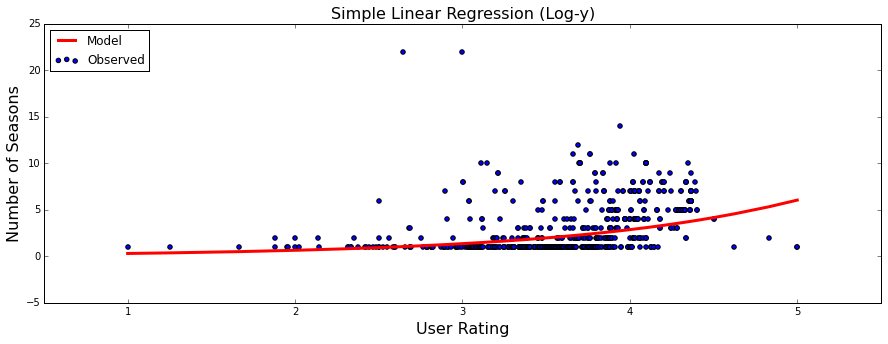

In [32]:
log_train1_Y_predict = log_train1_model.predict(log_train1_X).tolist()
log_train1_Y_predict = np.array([math.exp(y) for y in log_train1_Y_predict])

p = plt.figure(figsize=(15, 5))
tv_df.plot(ax=p.gca(), kind='scatter', x='UserRating', y='Seasons', label='Observed', )
plt.plot(log_train1_X['UserRating'], log_train1_Y_predict, c='red', label='Model', linewidth=3)
plt.xlabel('User Rating', fontsize='16')
plt.ylabel('Number of Seasons', fontsize='16')
plt.title('Simple Linear Regression (Log-y)', fontsize='16')
plt.legend(loc='upper left')
plt.axis([0.5, 5.5, -5, 25])

(array([   3.,   67.,  200.,  124.,  134.,   83.,   40.,   11.,    0.,    2.]),
 array([-1.79894504, -1.31396889, -0.82899275, -0.3440166 ,  0.14095955,
         0.6259357 ,  1.11091185,  1.595888  ,  2.08086415,  2.56584029,
         3.05081644]),
 <a list of 10 Patch objects>)

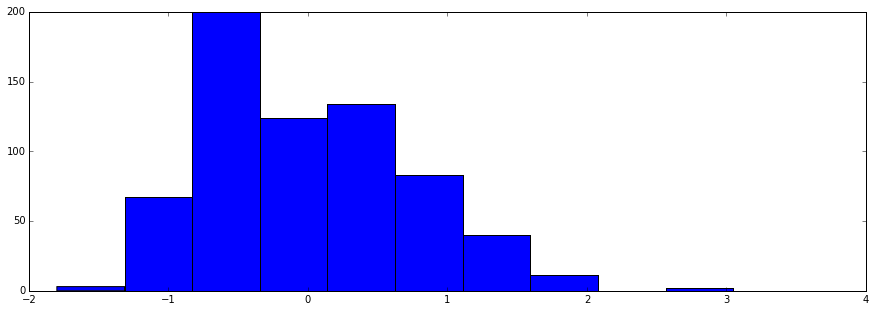

In [10]:
p = plt.figure(figsize=(15, 5))
plt.hist(log_train1_model.resid)

 ####<font color='red'>Case 1: Cross-validation</font>

In [41]:
log_cv1_y, log_cv1_X = dmatrices('SeasonsLog ~ UserRating', data=tv_df, return_type='dataframe')
log_cv1_X_array = log_cv1_X.values
log_cv1_y_array = log_cv1_y.values

n_samples = log_cv1_X_array.shape[0]
model = LinearRegression()

cv1_metrics = []

for i in range(3):
    temp = []
    cv = cross_validation.ShuffleSplit(n_samples, n_iter=5, random_state=i)
    scores = cross_validation.cross_val_score(model, log_cv1_X_array, log_cv1_y_array, cv=cv)
    temp.append('Trial ' + str(i+1))
    for score in scores:
        temp.append("%.4f" % score)
    temp.append("%.4f" % scores.mean())
    temp.append("%.4f" % scores.std())
    cv1_metrics.append(temp)
    
cols = ['Trial', 'Random1', 'Random2', 'Random3', 'Random4', 'Random5', 'Average', 'Std']
pd.DataFrame(cv1_metrics, columns=cols)

,Trial,Random1,Random2,Random3,Random4,Random5,Average,Std
0,Trial 1,0.2519,0.1738,0.0969,0.2912,0.2426,0.2113,0.0686
1,Trial 2,0.1119,0.2645,0.1611,0.1763,0.2121,0.1852,0.0511
2,Trial 3,0.3450,0.3324,0.2935,0.3351,0.2364,0.3085,0.0401


####<font color='red'>Test case 2: With 1 numeric predictor and 1 categorical predictor (User rating + Genre)</font>

In [36]:
log_train2_y, log_train2_X = dmatrices('SeasonsLog ~ UserRating + Genre', data=tv_df, return_type='dataframe')
log_train2_model = sm.OLS(log_train2_y, log_train2_X).fit()
log_train2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SeasonsLog   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     28.24
Date:                Sat, 18 Jul 2015   Prob (F-statistic):           7.35e-38
Time:                        22:26:08   Log-Likelihood:                -717.27
No. Observations:                 664   AIC:                             1453.
Df Residuals:                     655   BIC:                             1493.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept                   -2.4953      0.247    -10.092      0.000        -2.981    -2.010
Genre[T.Cartoons]            0.4370      0.206      2.122      0.034         0.033     0.841
Genre[T.Comedy]              0.2052      0.123      1.673      0.095        -0.036     0.446
Genre[T.Crime]               0.0531      0.133      0.400      0.689        -0.207     0.313
Genre[T.Drama]               0.0600      0.119      0.504      0.614        -0.174     0.294
Genre[T.Fantasy]            -0.0117      0.174     -0.067      0.946        -0.352     0.329
Genre[T.Reality]             0.4976      0.141      3.525      0.000         0.220     0.775
Genre[T.Science-Fiction]    -0.1514      0.187     -0.808      0.419        -0.519     0.217
UserRating                   0.8624      0.058     14.933      0.000         0.749     0.976
==============================================================================
Omnibus:                       22.299   Durbin-Watson:                   1.119
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.638
Skew:                           0.444   Prob(JB):                     7.36e-06
Kurtosis:                       3.255   Cond. No.                         47.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
log_train2_Y_predict = log_train2_model.predict(log_train2_X).tolist()
log_train2_Y_predict = np.array([math.exp(y) for y in log_train2_Y_predict])

[0.5, 5.5, -5, 25]

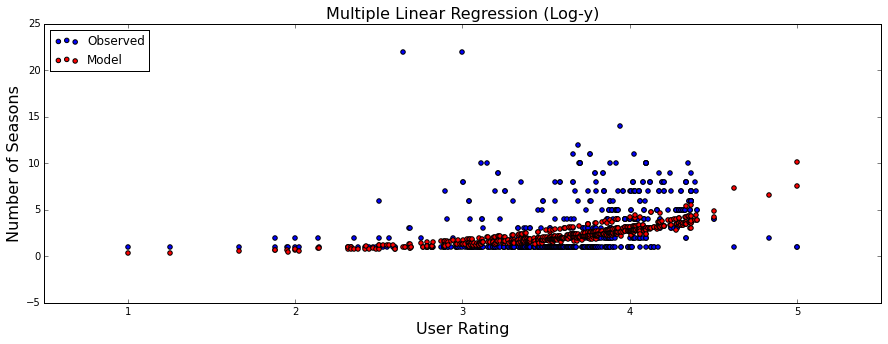

In [38]:
p = plt.figure(figsize=(15, 5))
tv_df.plot(ax=p.gca(), kind='scatter', x='UserRating', y='Seasons', label='Observed', )
plt.scatter(log_train2_X['UserRating'], log_train2_Y_predict, c='red', label='Model')
plt.xlabel('User Rating', fontsize='16')
plt.ylabel('Number of Seasons', fontsize='16')
plt.title('Multiple Linear Regression (Log-y)', fontsize='16')
plt.legend(loc='upper left')
plt.axis([0.5, 5.5, -5, 25])

(array([   3.,    7.,   93.,  225.,  146.,  122.,   53.,   12.,    1.,    2.]),
 array([-2.31425616, -1.772631  , -1.23100583, -0.68938067, -0.1477555 ,
         0.39386966,  0.93549483,  1.47711999,  2.01874516,  2.56037032,
         3.10199549]),
 <a list of 10 Patch objects>)

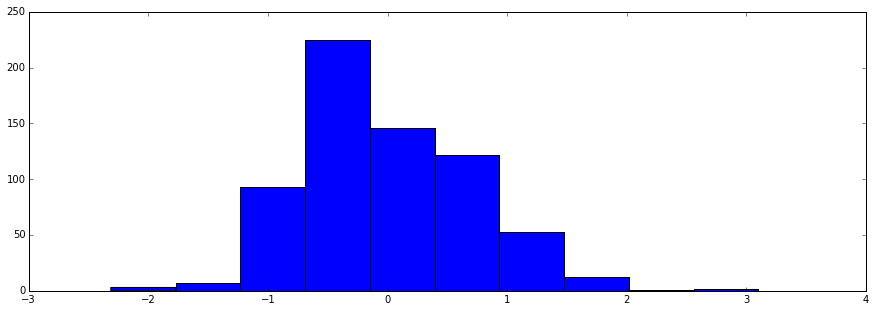

In [39]:
p = plt.figure(figsize=(15, 5))
plt.hist(log_train2_model.resid)

####<font color='red'>Case 2: Cross-validation</font>

In [61]:
log_cv2_y, log_cv2_X = dmatrices('SeasonsLog ~ UserRating  + Genre', data=tv_df, return_type='dataframe')
log_cv2_X_array = log_cv2_X.values
log_cv2_y_array = log_cv2_y.values

n_samples = log_cv2_X_array.shape[0]
model = LinearRegression()

cv2_metrics = []

for i in range(3):
    temp = []
    cv = cross_validation.ShuffleSplit(n_samples, n_iter=5, random_state=i)
    scores = cross_validation.cross_val_score(model, log_cv2_X_array, log_cv2_y_array, cv=cv)
    temp.append('Trial ' + str(i+1))
    for score in scores:
        temp.append("%.4f" % score)
    temp.append("%.4f" % scores.mean())
    temp.append("%.4f" % scores.std())
    cv2_metrics.append(temp)
    
cols = ['Trial', 'Random1', 'Random2', 'Random3', 'Random4', 'Random5', 'Average', 'Std']
pd.DataFrame(cv2_metrics, columns=cols)

,Trial,Random1,Random2,Random3,Random4,Random5,Average,Std
0,Trial 1,0.2896,0.1597,0.1704,0.2509,0.2253,0.2192,0.0488
1,Trial 2,0.2201,0.3575,0.2179,0.2235,0.1971,0.2432,0.0579
2,Trial 3,0.3909,0.3255,0.3605,0.3717,0.2002,0.3298,0.0682


####<font color='red'>Test case 3: With 1 numeric predictor and 2 categorical predictors (User rating + Genre + Network)</font>

In [54]:
log_train3_y, log_train3_X = dmatrices('SeasonsLog ~ UserRating + Genre + Network', data=tv_df, return_type='dataframe')
log_train3_model = sm.OLS(log_train3_y, log_train3_X).fit()
log_train3_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SeasonsLog   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     6.342
Date:                Sat, 18 Jul 2015   Prob (F-statistic):           7.20e-36
Time:                        22:30:45   Log-Likelihood:                -648.54
No. Observations:                 664   AIC:                             1423.
Df Residuals:                     601   BIC:                             1706.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept                     -1.7293      0.321     -5.386      0.000        -2.360    -1.099
Genre[T.Cartoons]              0.4886      0.212      2.300      0.022         0.071     0.906
Genre[T.Comedy]                0.1729      0.122      1.419      0.157        -0.066     0.412
Genre[T.Crime]                -0.0010      0.130     -0.008      0.994        -0.256     0.254
Genre[T.Drama]                 0.0153      0.116      0.132      0.895        -0.213     0.244
Genre[T.Fantasy]              -0.0243      0.170     -0.143      0.887        -0.358     0.310
Genre[T.Reality]               0.4185      0.143      2.930      0.004         0.138     0.699
Genre[T.Science-Fiction]      -0.0612      0.182     -0.336      0.737        -0.419     0.296
Network[T.A&AMP;E]             0.2110      0.442      0.478      0.633        -0.657     1.079
Network[T.A&E]                -0.4854      0.297     -1.633      0.103        -1.069     0.098
Network[T.ABC]                -0.5352      0.218     -2.452      0.015        -0.964    -0.106
Network[T.ABC Family]         -0.5754      0.279     -2.065      0.039        -1.123    -0.028
Network[T.AMC]                -0.2561      0.290     -0.882      0.378        -0.826     0.314
Network[T.Amazon]             -1.2530      0.526     -2.382      0.018        -2.286    -0.220
Network[T.BBC America]        -0.1675      0.271     -0.618      0.537        -0.700     0.365
Network[T.BET]                 0.1330      0.442      0.301      0.764        -0.735     1.001
Network[T.Bravo]               0.9101      0.521      1.747      0.081        -0.113     1.933
Network[T.CBS]                -0.3045      0.227     -1.343      0.180        -0.750     0.141
Network[T.CNNCCNNBCNNSCNN]     1.2301      0.707      1.739      0.083        -0.159     2.619
Network[T.Cartoon Network]    -0.7654      0.315     -2.429      0.015        -1.384    -0.146
Network[T.Channel 4 in UK]     0.9385      0.442      2.124      0.034         0.071     1.806
Network[T.Comedy Central]     -0.1091      0.319     -0.342      0.733        -0.736     0.518
Network[T.DirecTV]            -0.2216      0.346     -0.641      0.522        -0.900     0.457
Network[T.Discovery]           0.1595      0.448      0.356      0.722        -0.720     1.038
Network[T.Disney Channel]      0.0972      0.523      0.186      0.853        -0.930     1.125
Network[T.E]                   0.4837      0.710      0.681      0.496        -0.911     1.878
Network[T.E!]                 -0.5551      0.525     -1.057      0.291        -1.586     0.476
Network[T.FOX]                -0.6323      0.221     -2.862      0.004        -1.066    -0.198
Network[T.FX]                 -0.5036      0.284     -1.774      0.077        -1.061     0.054
Network[T.FXX]                -0.9907      

[0.5, 5.5, -5, 25]

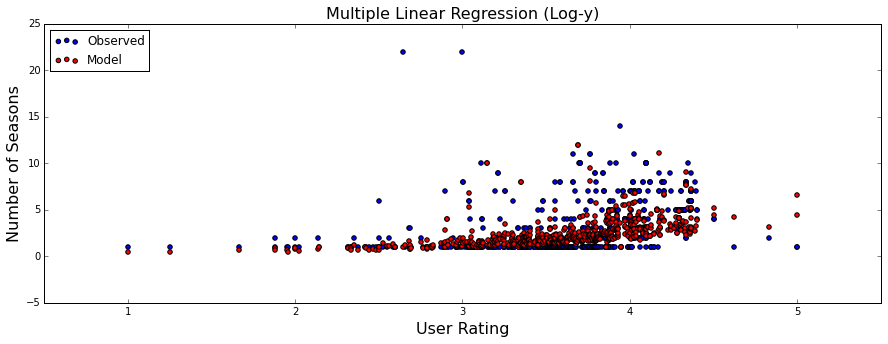

In [55]:
log_train3_Y_predict = log_train3_model.predict(log_train3_X).tolist()
log_train3_Y_predict = np.array([math.exp(y) for y in log_train3_Y_predict])
p = plt.figure(figsize=(15, 5))
tv_df.plot(ax=p.gca(), kind='scatter', x='UserRating', y='Seasons', label='Observed', )
plt.scatter(log_train3_X['UserRating'], log_train3_Y_predict, c='red', label='Model')
plt.xlabel('User Rating', fontsize='16')
plt.ylabel('Number of Seasons', fontsize='16')
plt.title('Multiple Linear Regression (Log-y)', fontsize='16')
plt.legend(loc='upper left')
plt.axis([0.5, 5.5, -5, 25])

(array([   6.,   25.,  172.,  215.,  132.,   73.,   34.,    4.,    1.,    2.]),
 array([-1.88156403, -1.38203793, -0.88251184, -0.38298575,  0.11654034,
         0.61606643,  1.11559252,  1.61511861,  2.11464471,  2.6141708 ,
         3.11369689]),
 <a list of 10 Patch objects>)

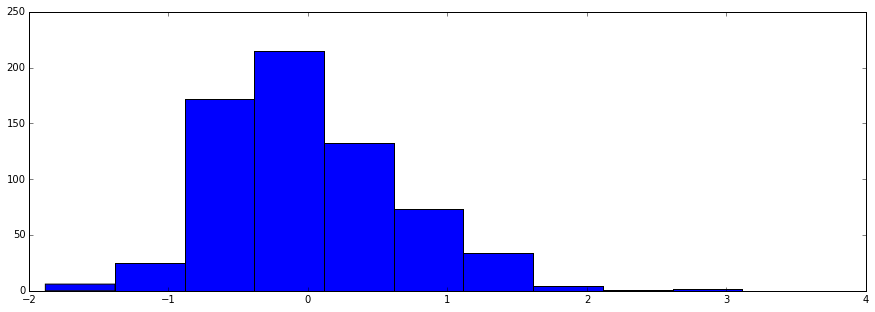

In [48]:
p = plt.figure(figsize=(15, 5))
plt.hist(log_train3_model.resid)

####<font color='red'>Case 3: Cross-validation</font> 

In [62]:
log_cv3_y, log_cv3_X = dmatrices('SeasonsLog ~ UserRating + Genre + Network', data=tv_df, return_type='dataframe')
log_cv3_X_array = log_cv3_X.values
log_cv3_y_array = log_cv3_y.values

n_samples = log_cv3_X_array.shape[0]
model = LinearRegression()

cv3_metrics = []

for i in range(3):
    temp = []
    cv = cross_validation.ShuffleSplit(n_samples, n_iter=5, random_state=i)
    scores = cross_validation.cross_val_score(model, log_cv3_X_array, log_cv3_y_array, cv=cv)
    temp.append('Trial ' + str(i+1))
    for score in scores:
        temp.append("%.4f" % score)
    temp.append("%.4f" % scores.mean())
    temp.append("%.4f" % scores.std())
    cv3_metrics.append(temp)
    
cols = ['Trial', 'Random1', 'Random2', 'Random3', 'Random4', 'Random5', 'Average', 'Std']
pd.DataFrame(cv3_metrics, columns=cols)

,Trial,Random1,Random2,Random3,Random4,Random5,Average,Std
0,Trial 1,0.4145,0.0023,0.2128,0.2593,0.3350,0.2448,0.1393
1,Trial 2,0.1540,0.3669,0.1938,0.3478,0.2224,0.2570,0.0850
2,Trial 3,0.3776,0.3499,0.4815,0.3687,0.2068,0.3569,0.0880


####<font color='red'>Test case 4: With 1 numeric predictor and 3 categorical predictors (User rating + Genre + Network + Duration)</font>

In [57]:
log_train4_y, log_train4_X = dmatrices('SeasonsLog ~ UserRating + Genre + Network + Duration', data=tv_df, return_type='dataframe')
log_train4_model = sm.OLS(log_train4_y, log_train4_X).fit()
log_train4_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SeasonsLog   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     6.090
Date:                Sat, 18 Jul 2015   Prob (F-statistic):           1.62e-35
Time:                        22:35:35   Log-Likelihood:                -644.76
No. Observations:                 664   AIC:                             1424.
Df Residuals:                     597   BIC:                             1725.
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept                     -0.8791      0.546     -1.610      0.108        -1.952     0.194
Genre[T.Cartoons]              0.4138      0.226      1.830      0.068        -0.030     0.858
Genre[T.Comedy]                0.1575      0.136      1.157      0.248        -0.110     0.425
Genre[T.Crime]                -0.0001      0.129     -0.001      0.999        -0.254     0.254
Genre[T.Drama]                 0.0162      0.116      0.139      0.889        -0.212     0.245
Genre[T.Fantasy]              -0.0109      0.170     -0.064      0.949        -0.344     0.323
Genre[T.Reality]               0.4192      0.143      2.938      0.003         0.139     0.699
Genre[T.Science-Fiction]      -0.0712      0.182     -0.392      0.696        -0.428     0.286
Network[T.A&AMP;E]             0.4081      0.452      0.902      0.367        -0.480     1.297
Network[T.A&E]                -0.3088      0.316     -0.978      0.328        -0.929     0.311
Network[T.ABC]                -0.3473      0.240     -1.447      0.148        -0.819     0.124
Network[T.ABC Family]         -0.4045      0.297     -1.360      0.174        -0.989     0.180
Network[T.AMC]                -0.0574      0.306     -0.187      0.851        -0.659     0.544
Network[T.Amazon]             -1.2588      0.549     -2.293      0.022        -2.337    -0.180
Network[T.BBC America]        -0.0240      0.291     -0.082      0.934        -0.595     0.547
Network[T.BET]                 0.3192      0.452      0.707      0.480        -0.568     1.206
Network[T.Bravo]               0.9236      0.545      1.695      0.091        -0.146     1.994
Network[T.CBS]                -0.1061      0.248     -0.428      0.669        -0.593     0.381
Network[T.CNNCCNNBCNNSCNN]     1.4249      0.713      2.000      0.046         0.026     2.824
Network[T.Cartoon Network]    -0.5561      0.334     -1.665      0.096        -1.212     0.100
Network[T.Channel 4 in UK]     1.1392      0.455      2.502      0.013         0.245     2.033
Network[T.Comedy Central]      0.0946      0.335      0.282      0.778        -0.564     0.753
Network[T.DirecTV]            -0.0689      0.358     -0.192      0.848        -0.773     0.635
Network[T.Discovery]           0.2922      0.459      0.637      0.524        -0.609     1.193
Network[T.Disney Channel]      0.2744      0.531      0.516      0.606        -0.769     1.318
Network[T.E]                   0.6972      0.716      0.974      0.330        -0.709     2.103
Network[T.E!]                 -0.3567      0.532     -0.671      0.503        -1.401     0.688
Network[T.FOX]                -0.4366      0.243     -1.794      0.073        -0.915     0.041
Network[T.FX]                 -0.3010      0.302     -0.995      0.320        -0.895     0.293
Network[T.FXX]                -0.8062      

[0.5, 5.5, -5, 25]

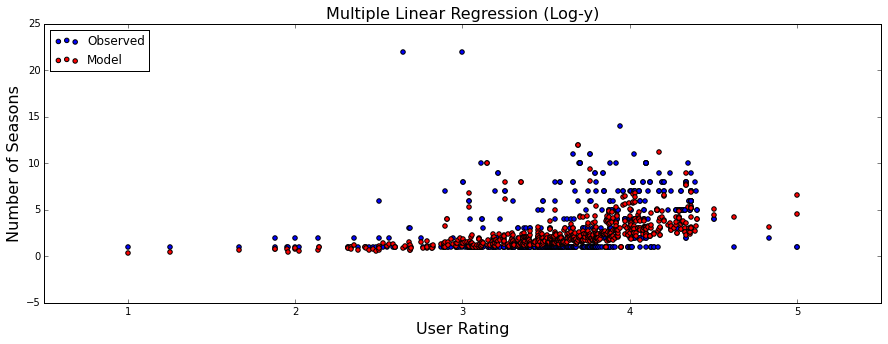

In [58]:
log_train4_Y_predict = log_train4_model.predict(log_train4_X).tolist()
log_train4_Y_predict = np.array([math.exp(y) for y in log_train4_Y_predict])

p = plt.figure(figsize=(15, 5))
tv_df.plot(ax=p.gca(), kind='scatter', x='UserRating', y='Seasons', label='Observed', )
plt.scatter(log_train4_X['UserRating'], log_train4_Y_predict, c='red', label='Model')
plt.xlabel('User Rating', fontsize='16')
plt.ylabel('Number of Seasons', fontsize='16')
plt.title('Multiple Linear Regression (Log-y)', fontsize='16')
plt.legend(loc='upper left')
plt.axis([0.5, 5.5, -5, 25])

(array([   6.,   25.,  174.,  216.,  135.,   69.,   32.,    4.,    1.,    2.]),
 array([-1.88854215, -1.3838558 , -0.87916945, -0.3744831 ,  0.13020325,
         0.6348896 ,  1.13957595,  1.6442623 ,  2.14894865,  2.653635  ,
         3.15832135]),
 <a list of 10 Patch objects>)

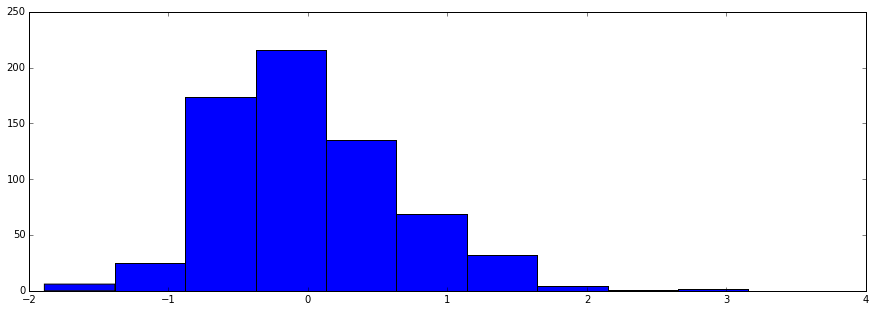

In [53]:
p = plt.figure(figsize=(15, 5))
plt.hist(log_train4_model.resid)

####<font color='red'>Case 4: Cross-validation</font> 

In [63]:
log_cv4_y, log_cv4_X = dmatrices('SeasonsLog ~ UserRating + Genre + Network + Duration', data=tv_df, return_type='dataframe')
log_cv4_X_array = log_cv4_X.values
log_cv4_y_array = log_cv4_y.values

n_samples = log_cv4_X_array.shape[0]
model = LinearRegression()

cv4_metrics = []

for i in range(3):
    temp = []
    cv = cross_validation.ShuffleSplit(n_samples, n_iter=5, random_state=i)
    scores = cross_validation.cross_val_score(model, log_cv4_X_array, log_cv4_y_array, cv=cv)
    temp.append('Trial ' + str(i+1))
    for score in scores:
        temp.append("%.4f" % score)
    temp.append("%.4f" % scores.mean())
    temp.append("%.4f" % scores.std())
    cv4_metrics.append(temp)
    
cols = ['Trial', 'Random1', 'Random2', 'Random3', 'Random4', 'Random5', 'Average', 'Std']
pd.DataFrame(cv4_metrics, columns=cols)

,Trial,Random1,Random2,Random3,Random4,Random5,Average,Std
0,Trial 1,0.4305,0.0183,0.2012,0.2815,0.3171,0.2497,0.1372
1,Trial 2,0.1412,0.3576,0.1881,0.3135,0.1771,0.2355,0.0843
2,Trial 3,0.3584,0.3538,0.4301,0.3516,0.2371,0.3462,0.0619
